# Task 02
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

For this task, I selected the Product Sales data, I will conduct a sales approach analysis for the new office stationery line.







# **Data Preprocessing**

This dataset comprises 15000 rows and 7 columns, with 'customer_id' as the index. I validated all variables and made necessary changes. The following table displays the data:

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/Product Sales.csv')
print(data.shape)
data.head(10)

(15000, 8)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [7]:
data.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

## Data Type Validation

In the data preprocessing stage, we standardized the 'sales_method' column by converting all entries to lowercase. Additionally, we corrected a specific category name, updating 'em + call' to 'email + call' for consistency. The resulting distribution of sales methods is as follows:

- Email: 7466 entries
- Call: 4962 entries
- Email + Call: 2572 entries

And we converted 'week,' 'nb_sold,' and 'sales_method' columns to categorical variables for improved analysis.

In [8]:
data['sales_method'] = data['sales_method'].str.lower()
data['sales_method'].replace({'em + call':'email + call'},inplace=True)
data['sales_method'].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

In [11]:
data[['week', 'nb_sold', 'sales_method']] = data[['week', 'nb_sold', 'sales_method']].astype('category')

## Data Cleaning

In the initial dataset, consisting of 15,000 rows and 7 columns, duplicate entries were identified and removed. Following this operation, the dataset was refined to 14,984 rows and 7 columns.

In [12]:
# Drop duplicates
print(data.shape)
data.drop_duplicates(inplace= True)
data.shape

(15000, 8)


(15000, 8)

The dataset was sorted in ascending order based on the 'nb_sold' column.

The 'revenue' column exhibited 1,064 missing values, which were subsequently addressed by employing a backward fill method to ensure completeness and coherence in the data.

In [13]:
data.isna().sum().sort_values()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
years_as_customer       0
nb_site_visits          0
state                   0
revenue              1074
dtype: int64

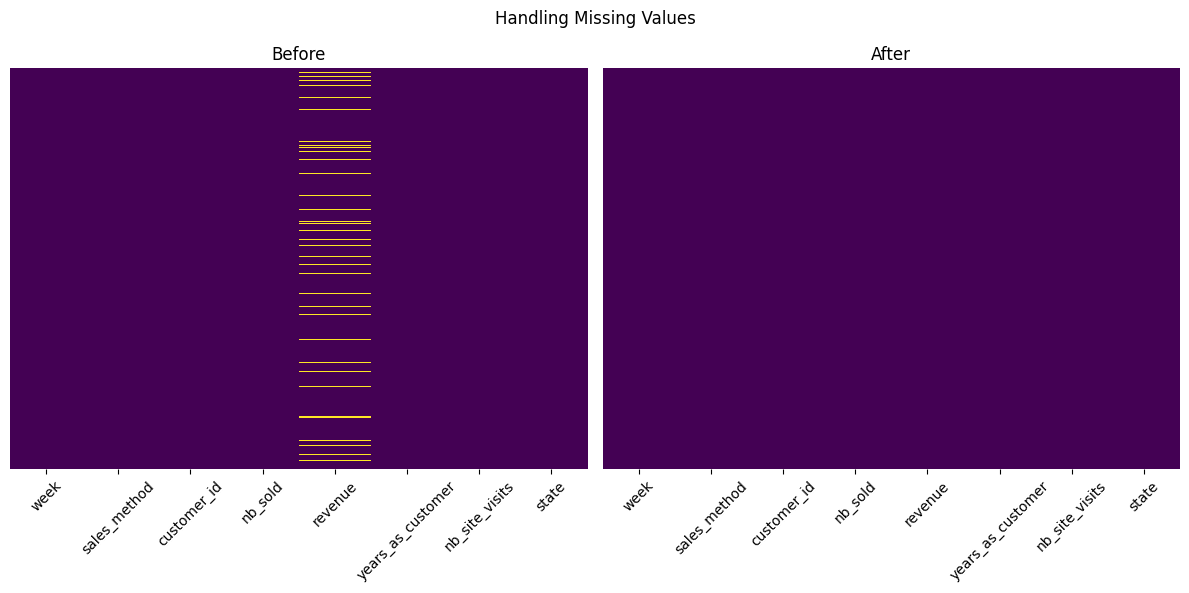

In [14]:
data_orig = data.copy()
data=data.sort_values(by='nb_sold', ascending=True)
data['revenue'].fillna(method='bfill', inplace=True)

# To check Missing Values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(data_orig.isnull(), cbar=False, yticklabels=False, cmap="viridis",ax=axes[0])
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis", ax=axes[1])
axes[0].set_title("Before")
axes[1].set_title("After")
fig.suptitle("Handling Missing Values")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()

Moving on to outlier handling, a method utilizing the Interquartile Range (IQR) was employed for numerical columns. This involved identifying the upper and lower bounds based on quartile values, with values exceeding these bounds being adjusted accordingly.

In [15]:
data_bef =data.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = data.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(data, column)

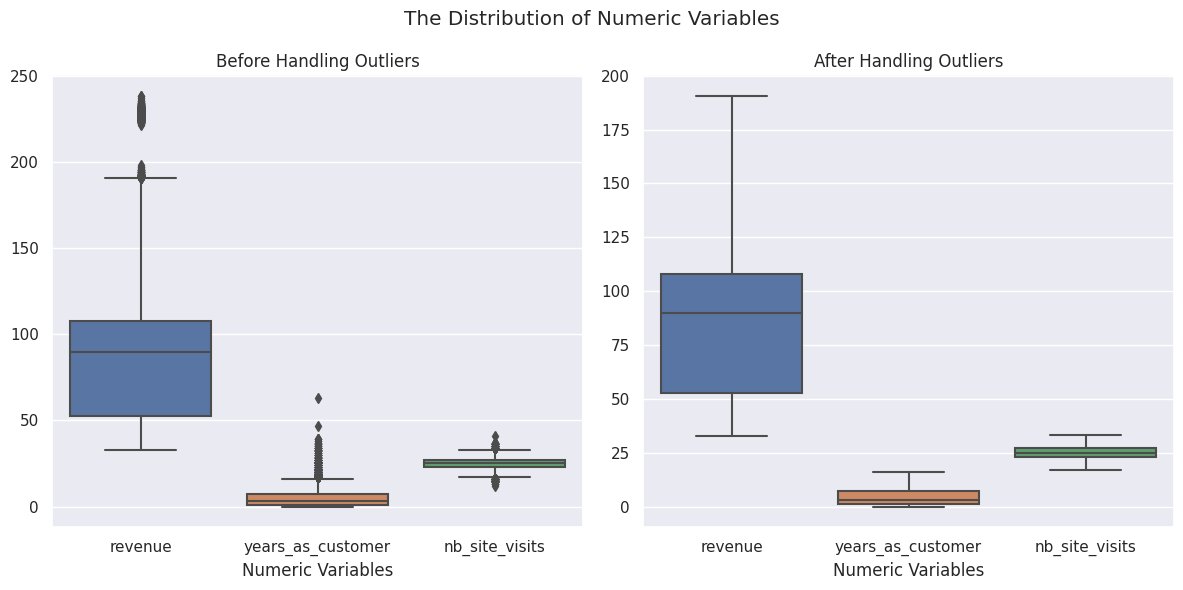

In [16]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(data,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")

plt.tight_layout()
plt.show()

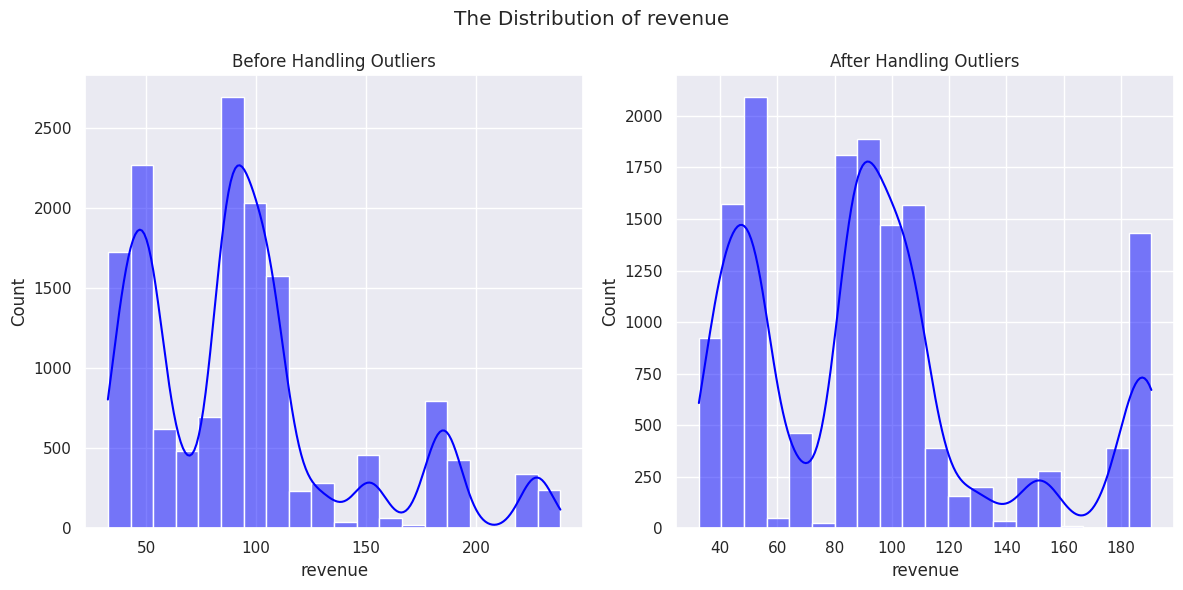

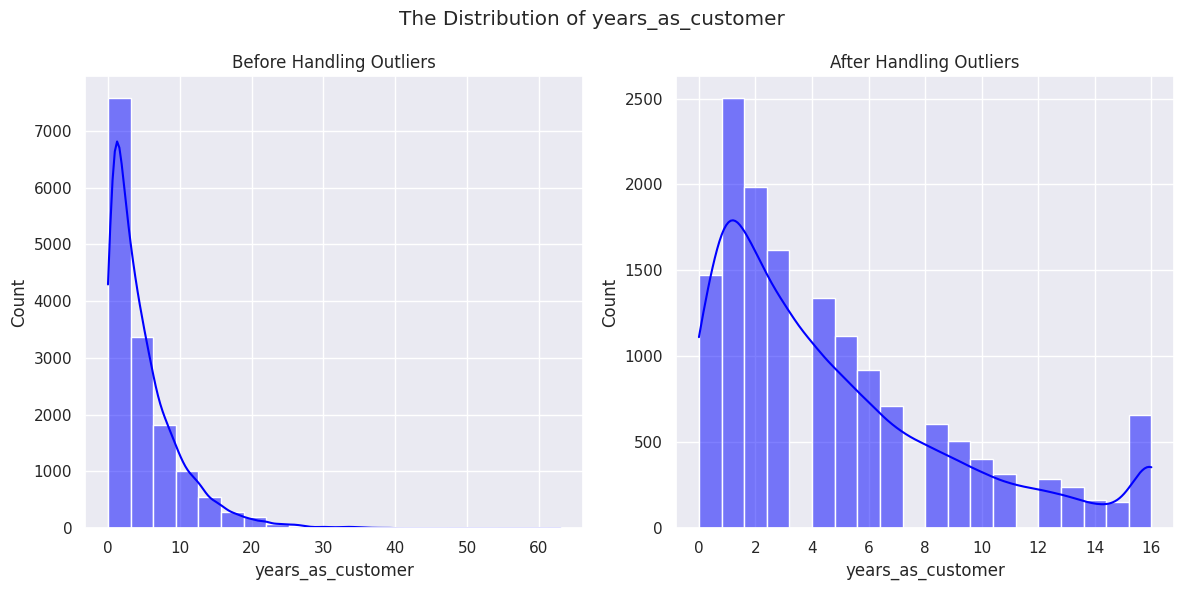

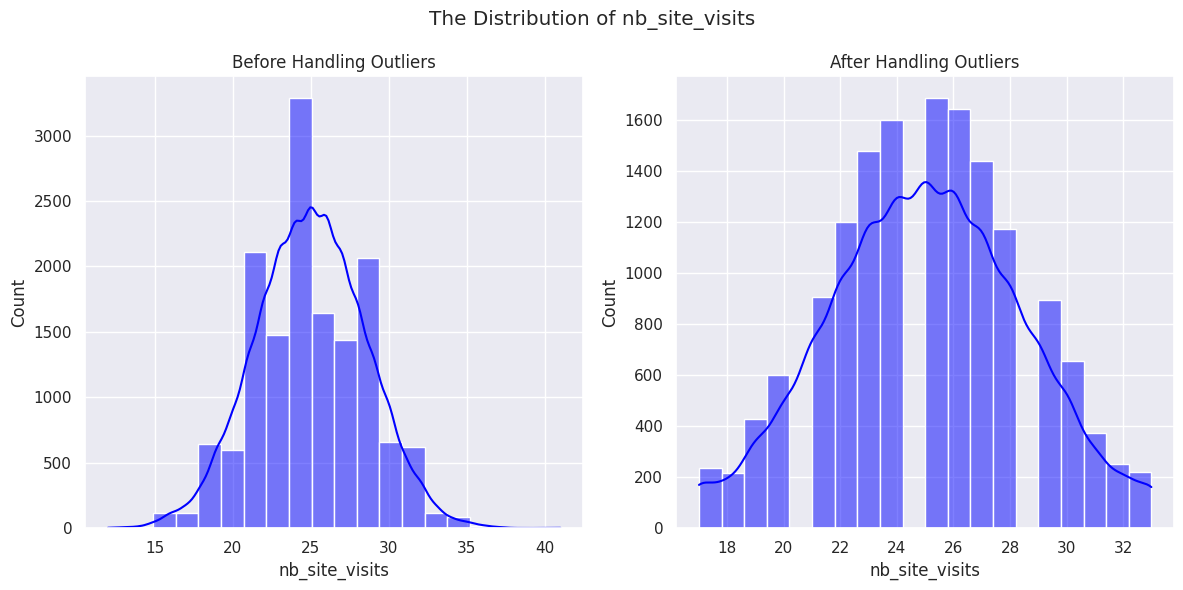

In [17]:
data_num = data.select_dtypes(include = ["float64", "int64"])
for col in data_num.columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(data_bef[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(data[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

In [19]:
data[['years_as_customer', 'nb_site_visits']] = data[['years_as_customer', 'nb_site_visits']].astype('int64')

# **Exploratory Analysis**

After changing the data type, all columns align with the data dictionary descriptions, and the data now has a shape of (14984, 7):


*   week: 6 categories  
*   sales_method: 3 categories
*   nb_sold: 10 categories
*   revenue: numeric values
*   years_as_customer: 17 unique values
*   nb_site_visits: 17 unique values
*   state: 50 states

In [20]:
data.sample(n=10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
10571,1,email,d9e2a32e-d652-4f4e-96b2-93650e720dfd,9,85.120,3,20,Michigan
11181,1,call,63afddf4-66ad-4920-b73f-d8d2ede70174,7,37.260,6,19,Texas
6134,1,email,f2075e65-ab80-4600-9aa7-e240151f3b01,8,81.290,6,17,North Dakota
14599,1,email,96c82139-8352-44d1-9f6b-72ad2a72327b,9,87.620,9,24,Michigan
14178,6,email + call,018b95db-2cdc-4fa1-948e-8a2b35e7c389,15,190.615,1,31,Arizona
1931,3,call,cd2bad0c-c6d1-4ac5-bad7-f1df761fa60a,8,41.870,0,22,Louisiana
2196,1,email,aa3c6cab-20bd-4b60-9667-c8f0109247dd,10,98.380,3,26,Oklahoma
14584,3,email,64a7e40c-1f45-4864-a90c-26f6c0e6a455,9,89.190,7,24,Texas
12265,1,email,2353389d-0be3-4fea-8de7-bc266681bde4,8,84.610,7,18,Florida
5943,4,call,bc683a7c-3330-4854-9485-2231a02f6174,10,50.780,13,23,Nevada


# **Questions**

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

## **How many customers were there for each approach?**

Looking at the chart, it can be seen that the number of customers reached by Email method is the largest with 7456 customers, accounting for 50% of the total number of customers.

Second is the Call method with 4959 customers, accounting for 33%.

And finally, the Email + Call method with 2569 customers and accounts for 17%.

sales_method
call            4962
email           7466
email + call    2572
dtype: int64


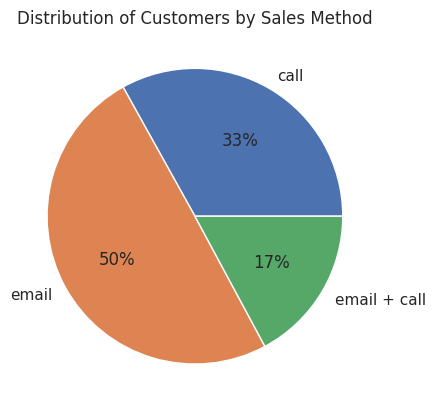

In [22]:
# How many customers were there for each approach?
Customers = data.groupby('sales_method').size()
print(Customers)
Customers.plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Customers by Sales Method')
plt.show()

## **What does the spread of the revenue look like overall? And for each method?**

Overall, the spread of the revenue looks non-normal and it's skewed to the right. It also has four peaks.

<ipython-input-23-f60d1d8d210e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['revenue'], shade=True)


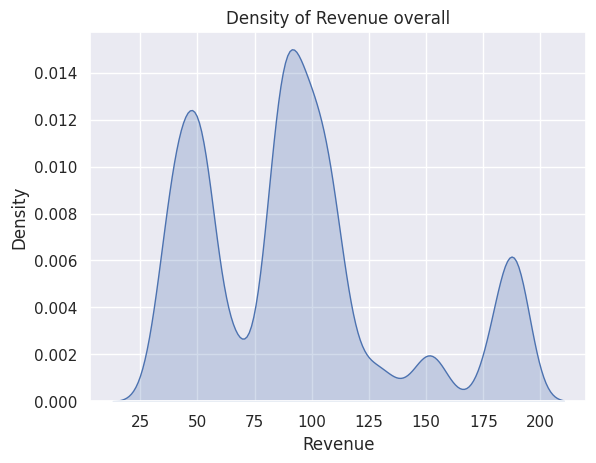

In [23]:
# What does the spread of the revenue look like overall?
sns.kdeplot(data['revenue'], shade=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Density of Revenue overall')
plt.show()

Based on the chart, it can be seen that the revenue from customers approached by Email method is the largest (719261.29 \$) followed by revenue from customers approached by Email + Call method (441328.04 \$) and last The last is the revenue from customers approached by Call method (243053.27 \$).

sales_method
call            242968.065
email           718012.340
email + call    441038.225
Name: revenue, dtype: float64


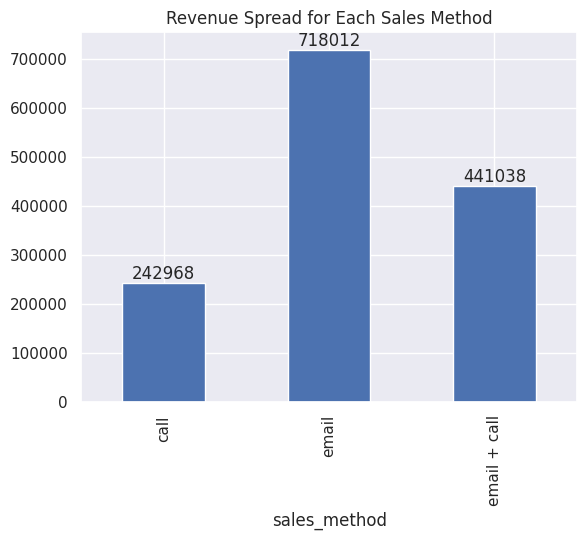

In [24]:
# What does the spread of the revenue look like for each method?
Mean_revenue = data.groupby('sales_method')['revenue'].sum()
print(Mean_revenue)
cx = Mean_revenue.plot.bar()
cx.bar_label(cx.containers[0], label_type='edge')
plt.title('Revenue Spread for Each Sales Method')
plt.show()

## **Was there any difference in revenue over time for each of the methods?**

Yes, The revenue for method indeed increased over time. However, the change varies among the methods.
- **Call** has the smallest increase. It has means of 35 in week 1 and 70 in week 6, a \$35 increase.
- **Email** has the second smallest increased. It has means of 86 in week 1, and 132 in week 6, a \$46 increase.
- **Email + Call** has the largest increase. For instance, its means for week 1 and week 6 are 122 and 190, respectively. That's an increase of $68.

Text(0.5, 1.0, 'The revenue of all sales methods increased each week')

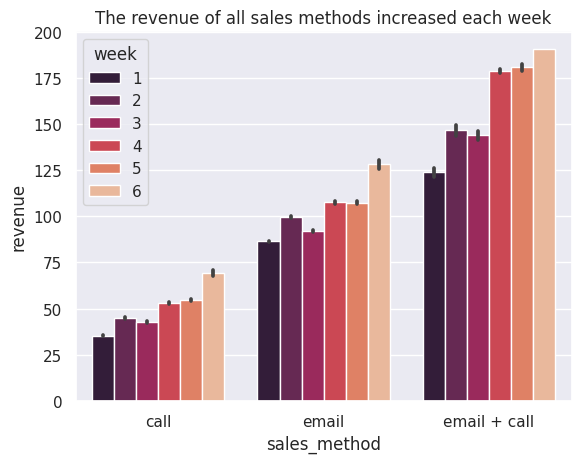

In [25]:
# Was there any difference in revenue over time for each of the methods?
sns.barplot(
    data=data, x="sales_method", y="revenue", hue="week", palette="rocket")

plt.title('The revenue of all sales methods increased each week')

In [26]:
# the mean and medians of the methods' revenue per week
data.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()

## **Based on the data, which method would you recommend we continue to use?**

I recommend that the company continues to use the **Email + Call** method since it captures the most revenue with the potential to significantly increase over time, followed by Email and finally Call.

# **Business Focus & Metrics**

## **The business goals**
**Maximize Sales Efficiency:**
- Evaluate customer reach for each sales approach.
- Identify the most efficient method to optimize resources.

**Revenue Optimization and Sustainability:**
- Examine revenue distribution and method-specific performance.
- Analyze time spent on customers and assess long-term sustainability

The company's goal is to earn higher revenue using the best sales method. I suggest using the average revenue of their preferred method as the key metric.

Data reveals the Email + Call method has the highest average revenue at \$171, compared to Email \$96 and Call \$49. If Email + Call is the preferred method, the sales team should use $171 as a baseline to gauge above or below-average sales.

Also, note that overall and weekly averages differ, weekly averages increase over time. Initial weeks might have lower averages than $171.

## **Recommendations**

1. **Method Selection:** I advise the company to persist with the Email + Call method, as it currently yields the highest revenue and exhibits the potential for significant future growth.

2. **Performance Metric:** It is recommended to use the average revenue generated by the chosen sales method as a key metric to monitor and enhance robust and escalating sales revenues.

3. **Email Method Retention:** Considering its cost-effective implementation, retaining the Email sales method is recommended.

4. **Cease Call Method:** Given its high cost (30 minutes per customer) coupled with the lowest revenue amounts, I suggest discontinuing the use of the Call method.

5. **Enhance Data Collection:** Investigate and address the issue of missing values in the revenue column (1064 missing in the data) to improve the overall data quality.